# Convolutional Neural Networks

In [1]:
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator
import numpy as np
from keras.preprocessing import image as im1
from matplotlib import image as im2
import matplotlib.pyplot as plt

### Data preprocessing

In [2]:
train_datagen = ImageDataGenerator( 
rescale = 1./255,
shear_range=0.2,
zoom_range=0.2,
horizontal_flip=True)

training_set = train_datagen.flow_from_directory(
'Section 40 - Convolutional Neural Networks (CNN)/dataset/training_set',
target_size=(64,64), # could be bigger, but we will use this so training set updates faster
batch_size=32,
class_mode='binary')

#help(ImageDataGenerator()) 

Found 8000 images belonging to 2 classes.


In [3]:
test_datagen = ImageDataGenerator(rescale=1./255)
test_set = test_datagen.flow_from_directory(
    'Section 40 - Convolutional Neural Networks (CNN)/dataset/test_set',
    target_size=(64,64),
    batch_size=32,
    class_mode='binary')

Found 2000 images belonging to 2 classes.


### Initialising the CNN

In [4]:
cnn = tf.keras.models.Sequential()

### Convolution

In [5]:
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3, activation='relu', input_shape=[64,64,3]))
#Filters is the numbers of features we want to detect, first argument
#Kernel size is the second argument, size 3 we will use, will use a 3-3 feature detector
#Activation will be a rectifier 
#input shape will be 64, 64, 3 since we reshaped. If it was black and white it would be 1 instead of 3

### Pooling

In [6]:
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))
#We will apply max pooling
#Pool size parameter is the size of the frame we are using to construct a pooled feature map
#Strides is the frame moving

### Adding a second layer

In [7]:
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

### Flattening

In [8]:
cnn.add(tf.keras.layers.Flatten())

### Full Connection

In [9]:
cnn.add(tf.keras.layers.Dense(units=128, activation='relu'))
#This will be added to the flattened layer
#Units will be 128, this is the amount of neurons

### Output Layer

In [10]:
cnn.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))
#Sigmoid since it is a binary classification, softmax for categorical 

### Compiling the CNN

In [11]:
cnn.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

### Training the CNN

In [12]:
cnn.fit(x = training_set, validation_data = test_set, epochs = 30)

Epoch 1/30
250/250 [==============================] - 48s 191ms/step - loss: 0.6871 - accuracy: 0.5446 - val_loss: 0.6625 - val_accuracy: 0.5875
Epoch 2/30
250/250 [==============================] - 42s 170ms/step - loss: 0.6330 - accuracy: 0.6442 - val_loss: 0.6014 - val_accuracy: 0.6685
Epoch 3/30
250/250 [==============================] - 41s 164ms/step - loss: 0.5712 - accuracy: 0.7004 - val_loss: 0.5479 - val_accuracy: 0.7305
Epoch 4/30
250/250 [==============================] - 42s 168ms/step - loss: 0.5399 - accuracy: 0.7284 - val_loss: 0.5349 - val_accuracy: 0.7350
Epoch 5/30
250/250 [==============================] - 47s 187ms/step - loss: 0.5157 - accuracy: 0.7496 - val_loss: 0.4987 - val_accuracy: 0.7610
Epoch 6/30
250/250 [==============================] - 49s 194ms/step - loss: 0.4883 - accuracy: 0.7656 - val_loss: 0.5174 - val_accuracy: 0.7500
Epoch 7/30
250/250 [==============================] - 47s 189ms/step - loss: 0.4759 - accuracy: 0.7667 - val_loss: 0.5093 - val_ac

### Lets Test this model on pictures

### Test 1: Dog

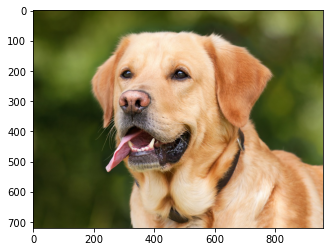

In [13]:
view = im2.imread('Section 40 - Convolutional Neural Networks (CNN)/dataset/single_prediction/cat_or_dog_1.jpg')
plt.imshow(view)

### Now lets see if our model can predict this is a dog

In [37]:
image = tf.keras.preprocessing.image.load_img('Section 40 - Convolutional Neural Networks (CNN)/dataset/single_prediction/cat_or_dog_1.jpg', target_size = (64, 64))
input_arr = tf.keras.preprocessing.image.img_to_array(image)
input_arr = np.array([input_arr])  # Convert single image to a batch.
predictions = cnn.predict(input_arr/255.0)
if(predictions > .5):
    print('This is a Dog, WOOF')
else: 
    print('This is a cat, MEOW')

1/1 [==============================] - 0s 22ms/step
This is a Dog, WOOF


### Test 2: Cat

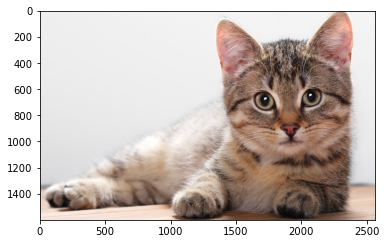

In [32]:
view = im2.imread('Section 40 - Convolutional Neural Networks (CNN)/dataset/single_prediction/cat_or_dog_2.jpg')
plt.imshow(view)

In [61]:
image = tf.keras.preprocessing.image.load_img('Section 40 - Convolutional Neural Networks (CNN)/dataset/single_prediction/cat_or_dog_2.jpg', target_size = (64, 64))
input_arr = tf.keras.preprocessing.image.img_to_array(image)
input_arr = np.array([input_arr])  # Convert single image to a batch.
predictions = cnn.predict(input_arr/255.0)
if(predictions[0][0] > .5):
    print('This is a Dog, WOOF')
else: 
    print('This is a cat, MEOW')

1/1 [==============================] - 0s 22ms/step
This is a cat, MEOW


### Test 3: Harper Horizontal

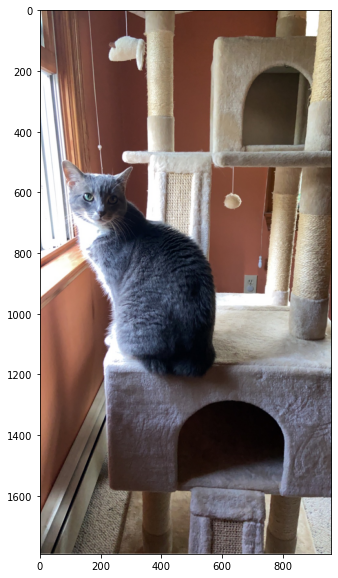

In [59]:
view = im2.imread('Harper1.jpg')
fig, ax = plt.subplots(1,1, figsize=(10,10))
ax.imshow(view)

In [62]:
image = tf.keras.preprocessing.image.load_img('Harper1.jpg', target_size = (64, 64))
input_arr = tf.keras.preprocessing.image.img_to_array(image)
input_arr = np.array([input_arr])  # Convert single image to a batch.
predictions = cnn.predict(input_arr/255.0)
if(predictions[0][0] > .5):
    print('This is a Dog, WOOF')
else: 
    print('This is a cat, MEOW')

1/1 [==============================] - 0s 29ms/step
This is a Dog, WOOF


### Test 4: Harper

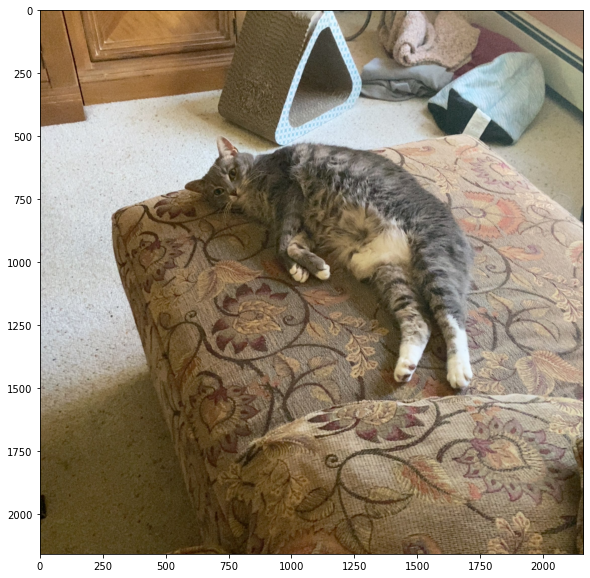

In [63]:
view = im2.imread('Harper2.jpg')
fig, ax = plt.subplots(1,1, figsize=(10,10))
ax.imshow(view)

In [58]:
image = tf.keras.preprocessing.image.load_img('Harper2.jpg', target_size = (64, 64))
input_arr = tf.keras.preprocessing.image.img_to_array(image)
input_arr = np.array([input_arr])  # Convert single image to a batch.
predictions = cnn.predict(input_arr/255.0)
if(predictions[0][0] > .5):
    print('This is a Dog, WOOF')
else: 
    print('This is a cat, MEOW')

1/1 [==============================] - 0s 21ms/step
This is a Dog, WOOF


### Test 5: Cat

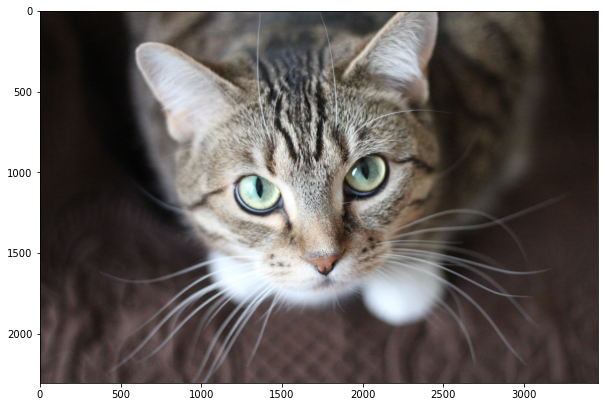

In [65]:
view = im2.imread('cat.jpg')
fig, ax = plt.subplots(1,1, figsize=(10,10))
ax.imshow(view)

In [67]:
image = tf.keras.preprocessing.image.load_img('cat.jpg', target_size = (64, 64))
input_arr = tf.keras.preprocessing.image.img_to_array(image)
input_arr = np.array([input_arr])  # Convert single image to a batch.
predictions = cnn.predict(input_arr/255.0)
if(predictions[0][0] > .5):
    print('This is a Dog, WOOF')
else: 
    print('This is a cat, MEOW')

1/1 [==============================] - 0s 20ms/step
This is a cat, MEOW


### Test 6:Dog

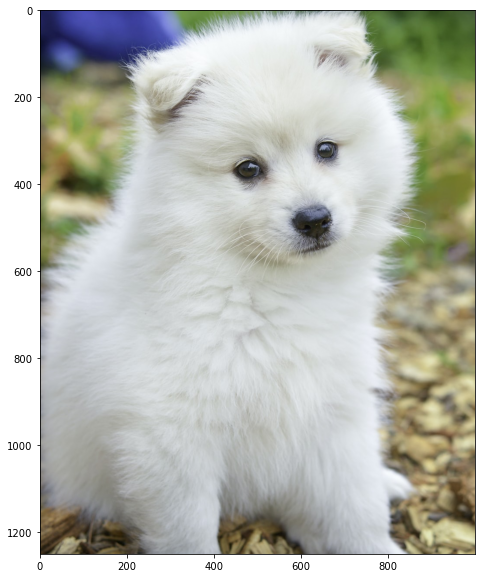

In [68]:
view = im2.imread('dog.jpg')
fig, ax = plt.subplots(1,1, figsize=(10,10))
ax.imshow(view)

In [69]:
image = tf.keras.preprocessing.image.load_img('dog.jpg', target_size = (64, 64))
input_arr = tf.keras.preprocessing.image.img_to_array(image)
input_arr = np.array([input_arr])  # Convert single image to a batch.
predictions = cnn.predict(input_arr/255.0)
if(predictions[0][0] > .5):
    print('This is a Dog, WOOF')
else: 
    print('This is a cat, MEOW')

1/1 [==============================] - 0s 33ms/step
This is a Dog, WOOF
